In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random as rn
import time
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import random


def estimateGaussian(x):
    m, n = x.shape
    mu = np.zeros((n, 1))
    sigma2 = np.zeros((n, 1))
    mu = (1/m)*np.nansum(x, axis=0)
    sigma2 = (1/(m-1))*np.nansum((x-mu)**2,axis=0)  
    return mu, sigma2


def normalized (x):
    minimum = np.min(x, axis = 0 )
    maximum = np.max(x, axis = 0 )
    return np.array([(x[i,:] - minimum)/(maximum - minimum) for i in range(len(x))])


def add_random ( dataset, sigma2 ):
    dataset = np.array([dataset[i,:] + rn.uniform(0, sigma2**(1/4)) for i in range(len(dataset))])
    return dataset


def add_n_years (dataset, n_year):
    new_dataset = dataset
    sigma2 = estimateGaussian(dataset)[1]
    for i in range(n_year):
        start_time = time.time()
        new_dataset = np.concatenate((new_dataset, add_random(dataset, sigma2)), axis=0)
        print('Loading', str(i+1), " - year ---------- %s seconds ---" % (time.time() - start_time))
    return new_dataset

In [2]:
# Read and formatting prepeared data for learning
df= pd.read_excel('Data_new_21_changed.xlsx', columns = ['Date & Time','FI_C771J1.PV','FI_C771J2.PV','HC_C771L.OP','HC_C771J1.OP','TI_C771T11.PV','TI_C771T21.PV','TI_C771T31.PV','TI_C771T41.PV','TI_C771T51.PV','TI_C771T61.PV','VI_C771X11.PV','VI_C771X21.PV','VI_C771W11.PV','VI_C771W21.PV','VI_C771V11.PV','VI_C771V21.PV','VI_C771U11.PV','VI_C771U21.PV','PI_C771C2.PV','PI_C771H.PV','IT_C771F'])
X = np.array(df.fillna(0))[:15000,1:-1]
y = df['y'][:15000]

In [3]:
# Calulate data with random for extra n years
n = 20 # Add year for data
X_n_years = add_n_years(X, n-1)
y_n_years = np.array(list(y)*n)

Loading 1  - year ---------- 0.5235269069671631 seconds ---
Loading 2  - year ---------- 0.49853014945983887 seconds ---
Loading 3  - year ---------- 0.5215122699737549 seconds ---
Loading 4  - year ---------- 0.5954475402832031 seconds ---
Loading 5  - year ---------- 0.705345630645752 seconds ---
Loading 6  - year ---------- 0.6803689002990723 seconds ---
Loading 7  - year ---------- 0.5454933643341064 seconds ---
Loading 8  - year ---------- 0.5494906902313232 seconds ---
Loading 9  - year ---------- 0.5804595947265625 seconds ---
Loading 10  - year ---------- 0.5574829578399658 seconds ---
Loading 11  - year ---------- 0.5964462757110596 seconds ---
Loading 12  - year ---------- 0.6314144134521484 seconds ---
Loading 13  - year ---------- 0.6074376106262207 seconds ---
Loading 14  - year ---------- 0.5784611701965332 seconds ---
Loading 15  - year ---------- 0.661391019821167 seconds ---
Loading 16  - year ---------- 0.6893539428710938 seconds ---
Loading 17  - year ---------- 0.69

In [4]:
# Building model
X_train, X_test, y_train, y_test = train_test_split(X_n_years, y_n_years, test_size = 0.2)
lm = RandomForestClassifier(n_estimators=100)
model = lm.fit ( X_train, y_train )
print('Score: ', model.score( X_test, y_test) *100)

Score:  99.87


In [5]:
# Downloading real data for testing
df_test= pd.read_excel('Data_new_21.xlsx', columns = ['Date','FI_C771J1.PV','FI_C771J2.PV','HC_C771L.OP','HC_C771J1.OP','TI_C771T11.PV','TI_C771T21.PV','TI_C771T31.PV','TI_C771T41.PV','TI_C771T51.PV','TI_C771T61.PV','VI_C771X11.PV','VI_C771X21.PV','VI_C771W11.PV','VI_C771W21.PV','VI_C771V11.PV','VI_C771V21.PV','VI_C771U11.PV','VI_C771U21.PV','PI_C771C2.PV','PI_C771H.PV','IT_C771F'])
X_original = (np.array(df_test.fillna(0))[:,:-1])
pred_y = model.predict(X_original[:,1:])

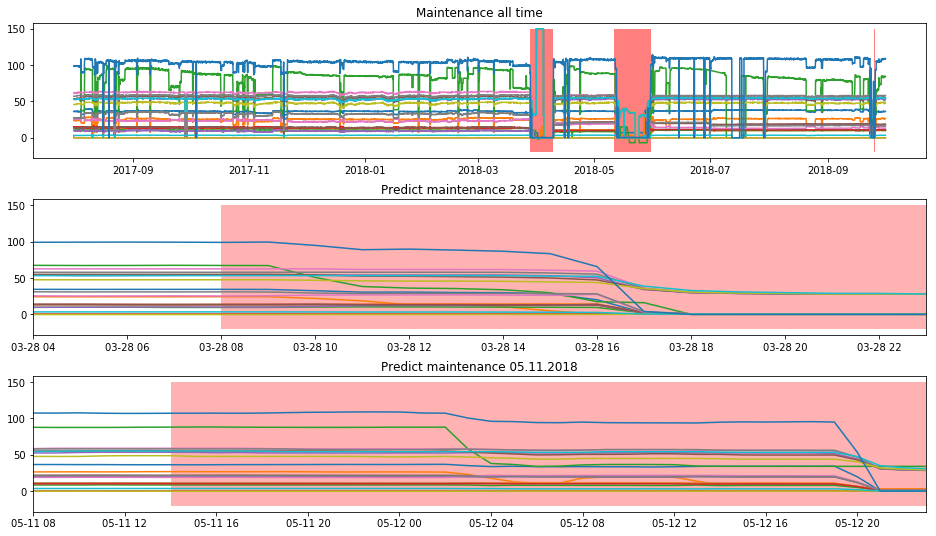

In [7]:
# Plotting resul
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, figsize=(16,9))
plt.subplots_adjust(hspace=0.3)

ax1.plot(X_original[:,0], X_original[:,1:])
ax1.fill_between(X_original[:,0], -20, 150, where= pred_y ==1, facecolor='red', alpha = 0.5)
ax1.set_title('Maintenance all time')

ax2.plot(X_original[:,0], X_original[:,1:])
ax2.fill_between(X_original[:,0], -20, 150, where= pred_y ==1, facecolor='red', alpha = 0.3)
ax2.set_xlim(datetime(2018,3,28,4,0), datetime(2018,3,28,23,0))
ax2.set_title('Predict maintenance 28.03.2018')
plt.grid()

ax3.plot(X_original[:,0], X_original[:,1:])
ax3.fill_between(X_original[:,0], -20, 150, where= pred_y ==1, facecolor='red', alpha = 0.3)
ax3.set_xlim(datetime(2018,5,11,8,0), datetime(2018,5,12,23,0))
ax3.set_title('Predict maintenance 05.11.2018')
plt.grid()